In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout, Input
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import DenseNet121

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt


In [7]:
print(tf.__version__)
# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check for GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Num GPUs Available: ", len(gpus))
    print("GPU details:", gpus)
else:
    print("No GPU detected. Ensure CUDA and cuDNN are properly installed.")

2.10.1
TensorFlow version: 2.10.1
Num GPUs Available:  1
GPU details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
#load and preprocess data
train_dir = '../big_data_v2/'

img_height, img_width = 224,224
batch_size = 50

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height,img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

Found 11835 images belonging to 2 classes.
Found 2958 images belonging to 2 classes.


#build Model




input_shape = (img_height, img_width, 3) 

model = Sequential([

    Input(shape=input_shape), 

    Conv2D(32,(3,3), activation = 'relu'), 
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),

    Flatten(),
    Dense(512,activation = 'relu'),
    Dropout(0.5),
    Dense(1,activation = 'sigmoid')

])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

In [41]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(1024, 1024, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='softmax')(x)

model_densenet = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model_densenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Summary of the model
model_densenet.summary()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(1024, 1024, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='softmax')(x)

model_inception = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model_inception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Summary of the model
model_inception.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 511, 511, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 511, 511, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(1024, 1024, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='softmax')(x)

model_resnet = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Summary of the model
model_resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1024, 1024,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 1030, 1030,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, 512, 512, 64  9472        ['conv1_pad[0][0]']              
                                )                                                           

In [10]:


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model layers


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='softmax')(x)

model_efficient_net = tf.keras.Model(inputs=base_model.input, outputs=predictions)


model_efficient_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model_efficient_net.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 512, 512, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 512, 512, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 512, 512, 3)  0           ['normalization[0][0]']    

In [ ]:
new_learning_rate = 0.001
#K.set_value(model.optimizer.learning_rate, new_learning_rate)

In [21]:
# Train the model

epochs = 5

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.00001)

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks = [reduce_lr],
    validation_data=validation_generator
)



Epoch 1/5
237/237 [==============================] - 109s 459ms/step - loss: 0.0263 - accuracy: 0.9894 - val_loss: 0.0501 - val_accuracy: 0.9824 - lr: 2.5000e-04
Epoch 2/5
237/237 [==============================] - 109s 459ms/step - loss: 0.0221 - accuracy: 0.9915 - val_loss: 0.0363 - val_accuracy: 0.9875 - lr: 2.5000e-04
Epoch 3/5
237/237 [==============================] - 109s 462ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 0.0640 - val_accuracy: 0.9817 - lr: 2.5000e-04
Epoch 4/5
237/237 [==============================] - 109s 459ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0388 - val_accuracy: 0.9861 - lr: 2.5000e-04
Epoch 5/5
237/237 [==============================] - 109s 458ms/step - loss: 0.0197 - accuracy: 0.9929 - val_loss: 0.0662 - val_accuracy: 0.9797 - lr: 2.5000e-04


In [22]:
model.save('VGG16_bincheck_hole_224x224.h5')

In [23]:
# Evaluate the model on the validation data
#model = load_model('VGG16_bincheck_walls_224x224.h5')
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

60/60 [==============================] - 22s 368ms/step - loss: 0.0602 - accuracy: 0.9828
Validation Loss: 0.060163188725709915
Validation Accuracy: 0.982758641242981


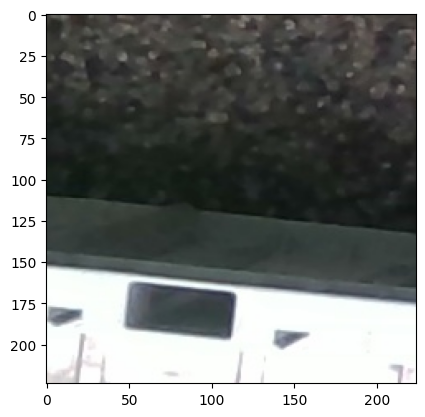

1/1 [==============================] - 0s 23ms/step
The image is classified as: Bincheck passed, expected result: Bincheck passed


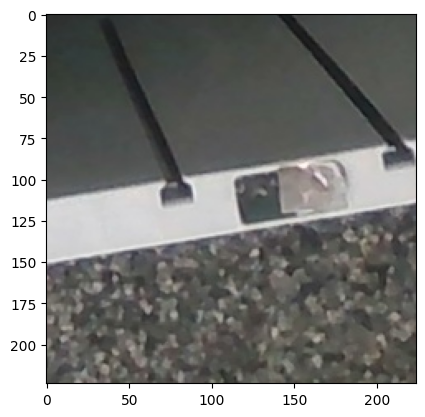

1/1 [==============================] - 0s 21ms/step
The image is classified as: Bincheck failed, expected result: Bincheck failed


In [27]:


def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.show()
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    img_array /= 255.0  # Normalize
    prediction = model.predict(img_array)
   
    return 'Bincheck passed' if prediction[0] > 0.5 else 'Bincheck failed'

# Example prediction
img_path = f'../big_data_v2/positive/positive_{np.random.randint(0,5000)}.jpg'
result = predict_image(img_path, model)
print(f"The image is classified as: {result}, expected result: Bincheck passed")

img_path = f'../big_data_v2/negative/negative_{np.random.randint(0,5000)}.jpg'
result = predict_image(img_path, model)
print(f"The image is classified as: {result}, expected result: Bincheck failed")